<a href="https://colab.research.google.com/github/Banan2003Obeidat/-BI-PROJECT-CAR-/blob/main/BI_PROJECT_CAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='hotpink'>**Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


# <font color='hotpink'>**Read data**


In [3]:
!pip install opendatasets

In [4]:
!pip install opencv-python

"username":"bananamobeidat" ,  Key : 123456789

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aminesnoussi/carprice-assignmentcsv?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bananamobeidat
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aminesnoussi/carprice-assignmentcsv


100%|██████████| 6.07k/6.07k [00:00<00:00, 19.0MB/s]

In [15]:
df=pd.read_csv("/content/carprice-assignmentcsv/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# <font color='hotpink'>**Exploratory Data Analysis (EDA)**

In [16]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (205, 26)


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [20]:
for col in df.columns:
  print(f"{col}:{df[col].nunique()}unique values")

car_ID:205unique values
symboling:6unique values
CarName:147unique values
fueltype:2unique values
aspiration:2unique values
doornumber:2unique values
carbody:5unique values
drivewheel:3unique values
enginelocation:2unique values
wheelbase:53unique values
carlength:75unique values
carwidth:44unique values
carheight:49unique values
curbweight:171unique values
enginetype:7unique values
cylindernumber:7unique values
enginesize:44unique values
fuelsystem:8unique values
boreratio:38unique values
stroke:37unique values
compressionratio:32unique values
horsepower:59unique values
peakrpm:23unique values
citympg:29unique values
highwaympg:30unique values
price:189unique values


In [21]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [22]:
print(f"Mean price: {df['price'].mean():.2f}")
print(f"Std deviation: {df['price'].std():.2f}")
print(f"Max price: {df['price'].max()}")
print(f"Min price: {df['price'].min()}")


Mean price: 13276.71
Std deviation: 7988.85
Max price: 45400.0
Min price: 5118.0


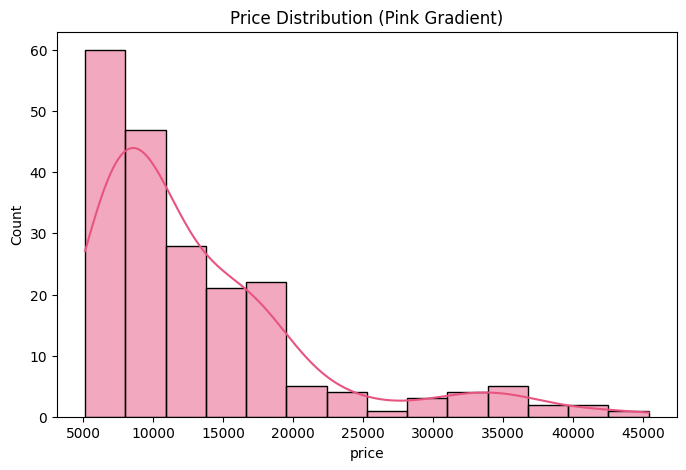

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, color="#e75480")
plt.title("Price Distribution (Pink Gradient)")
plt.show()



In [24]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'car_ID']

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


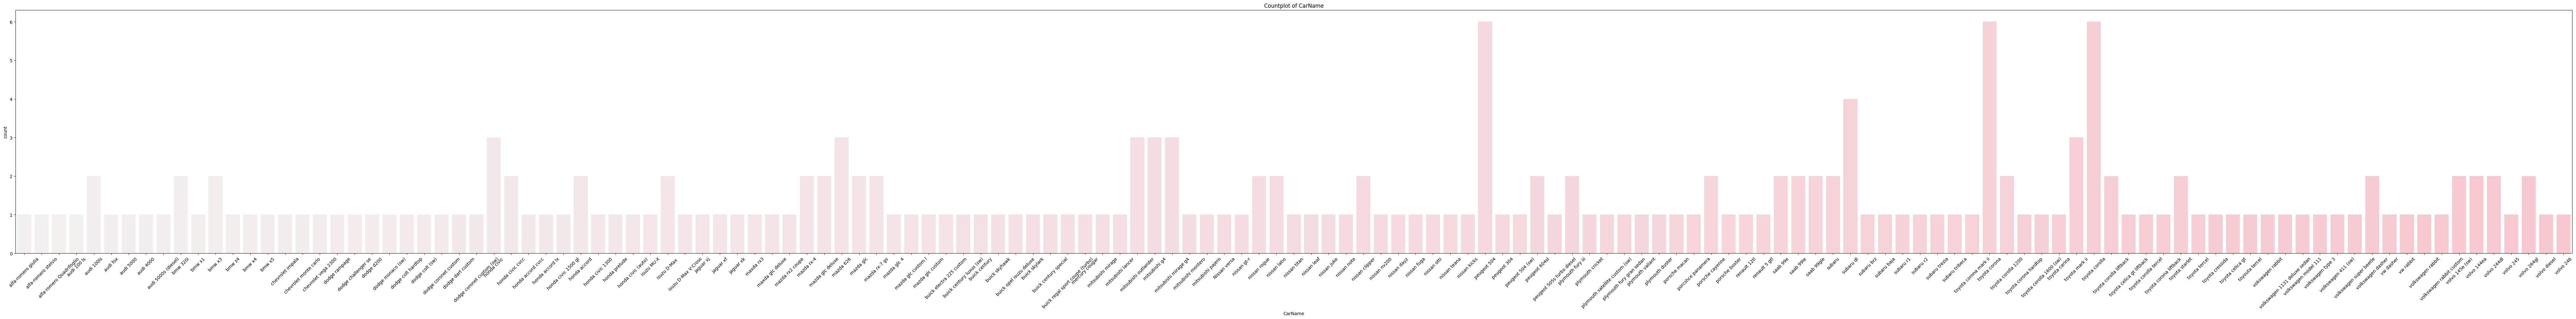

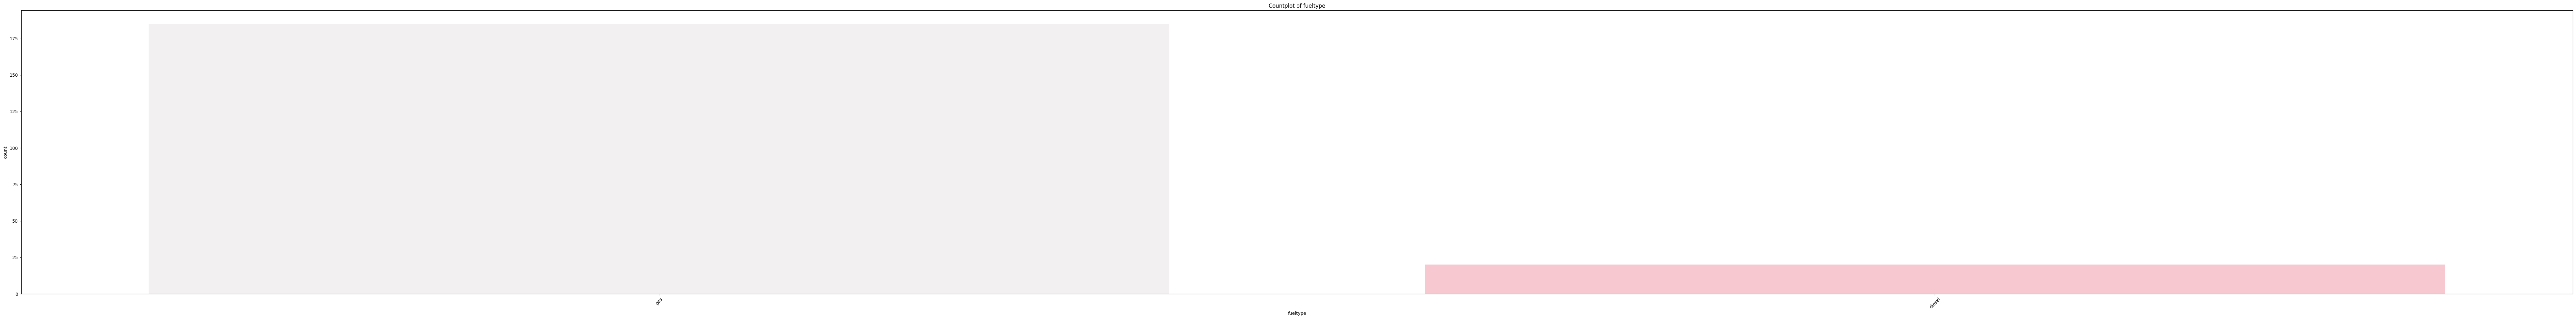

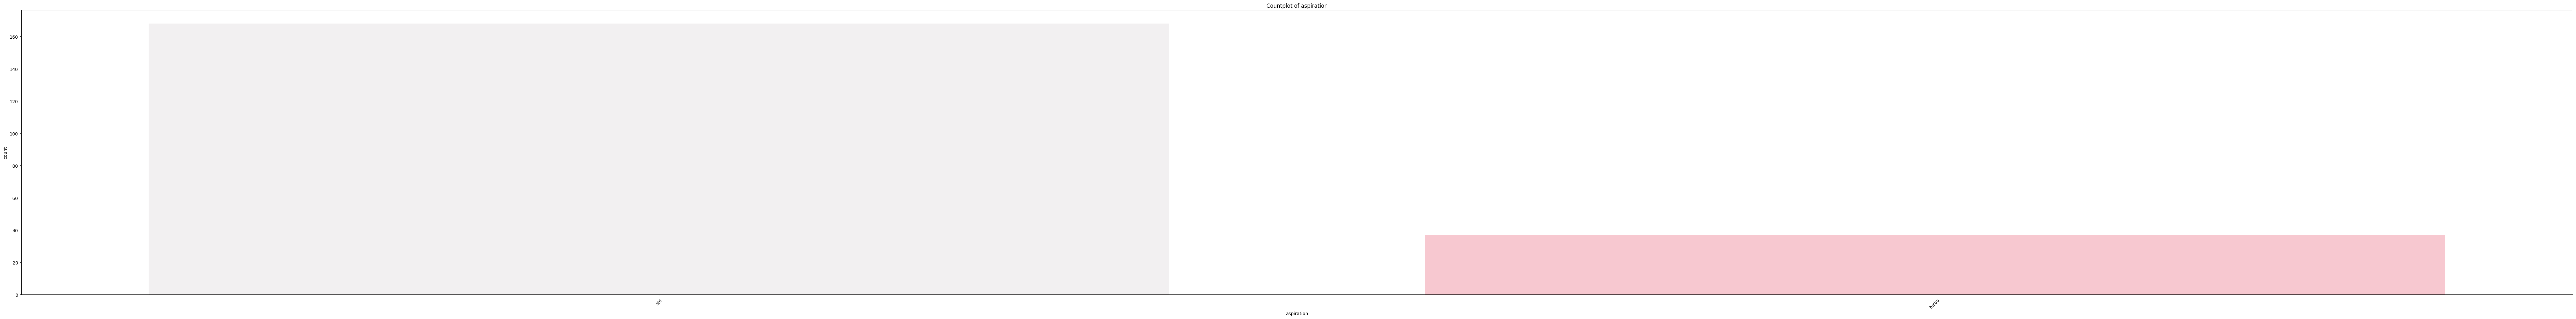

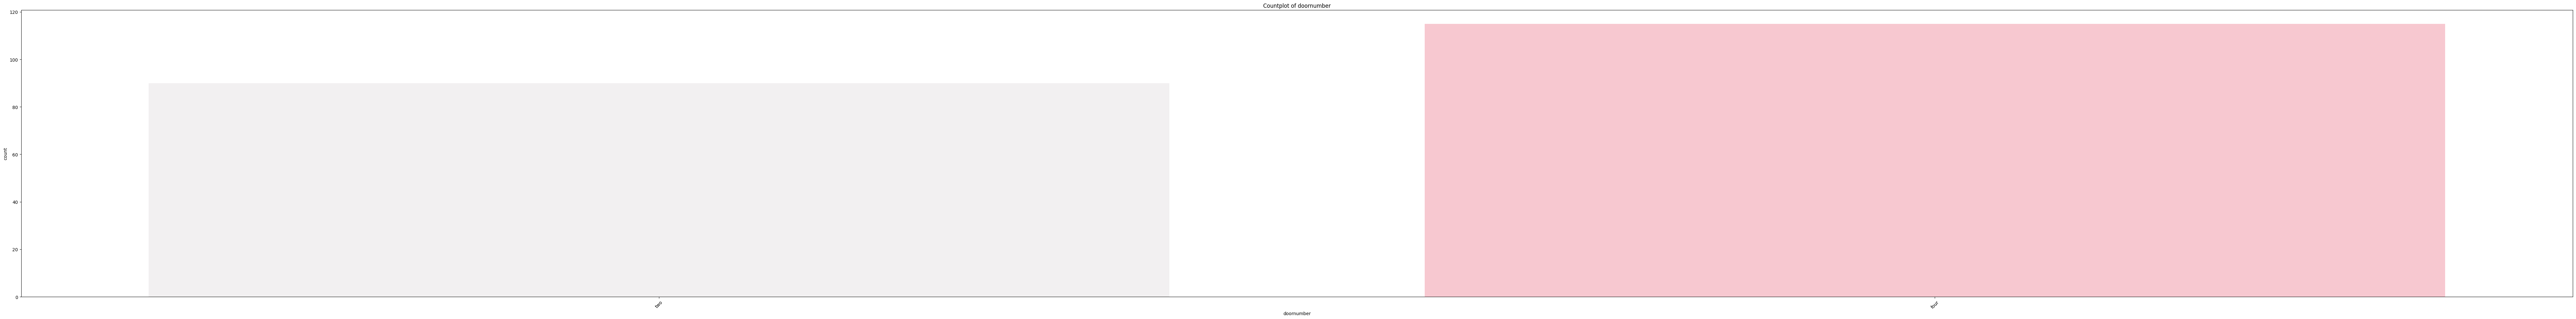

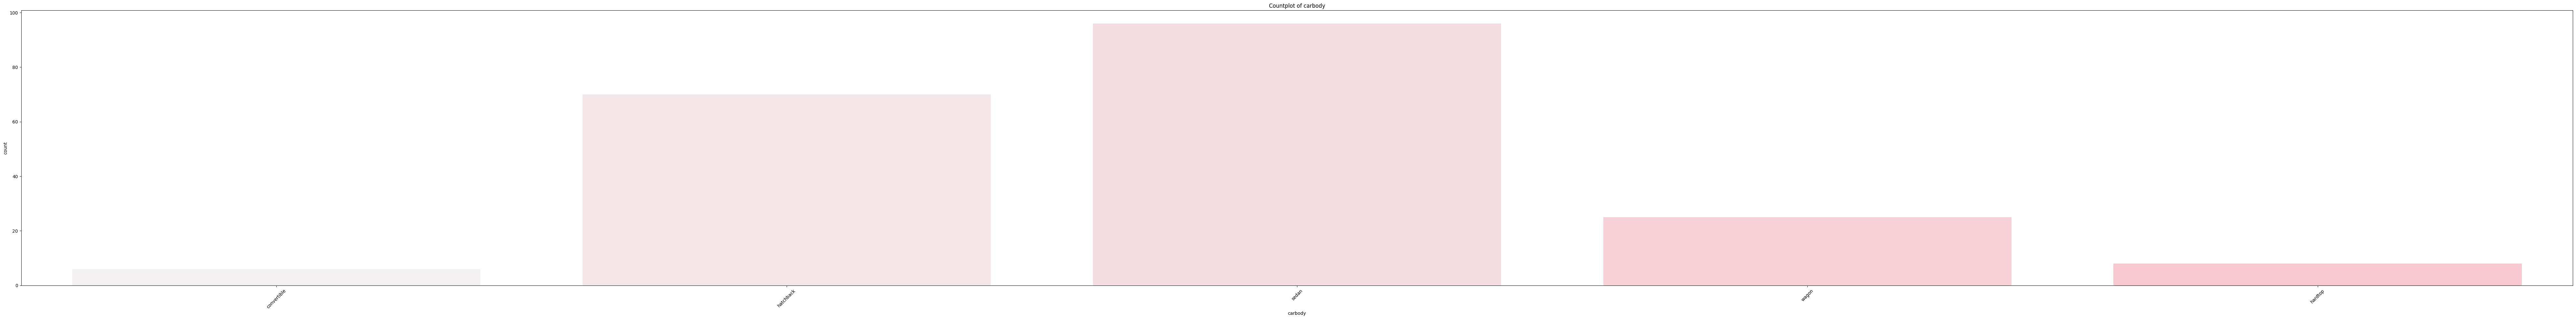

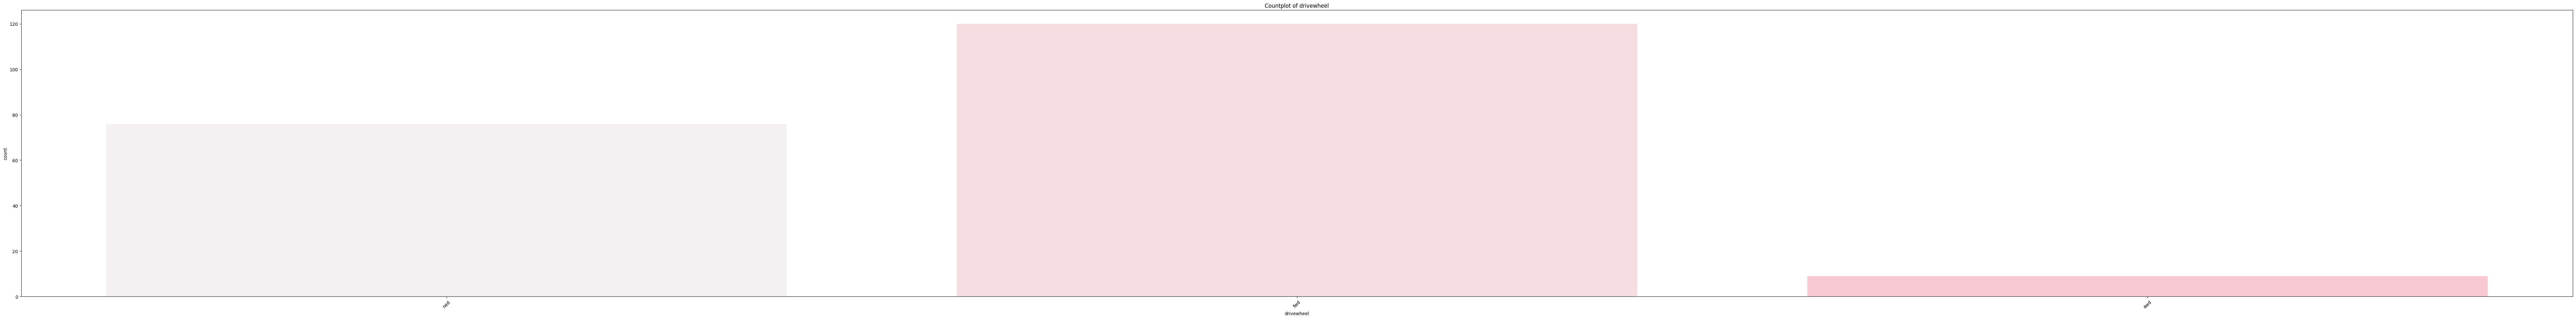

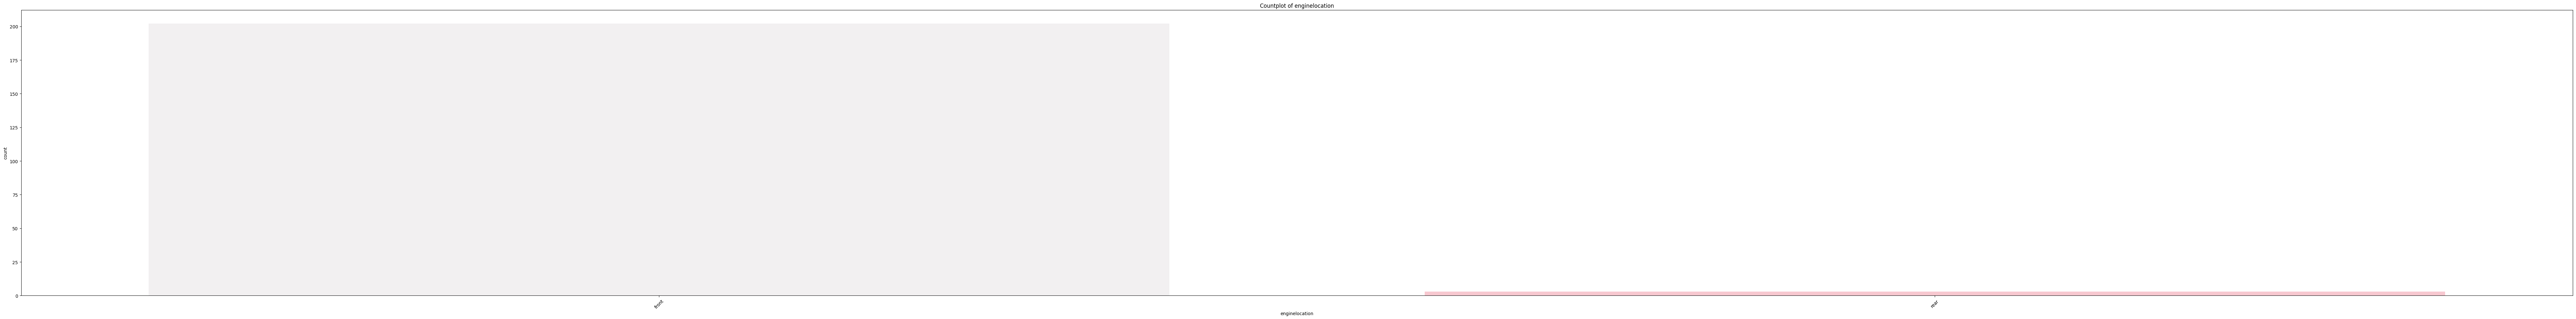

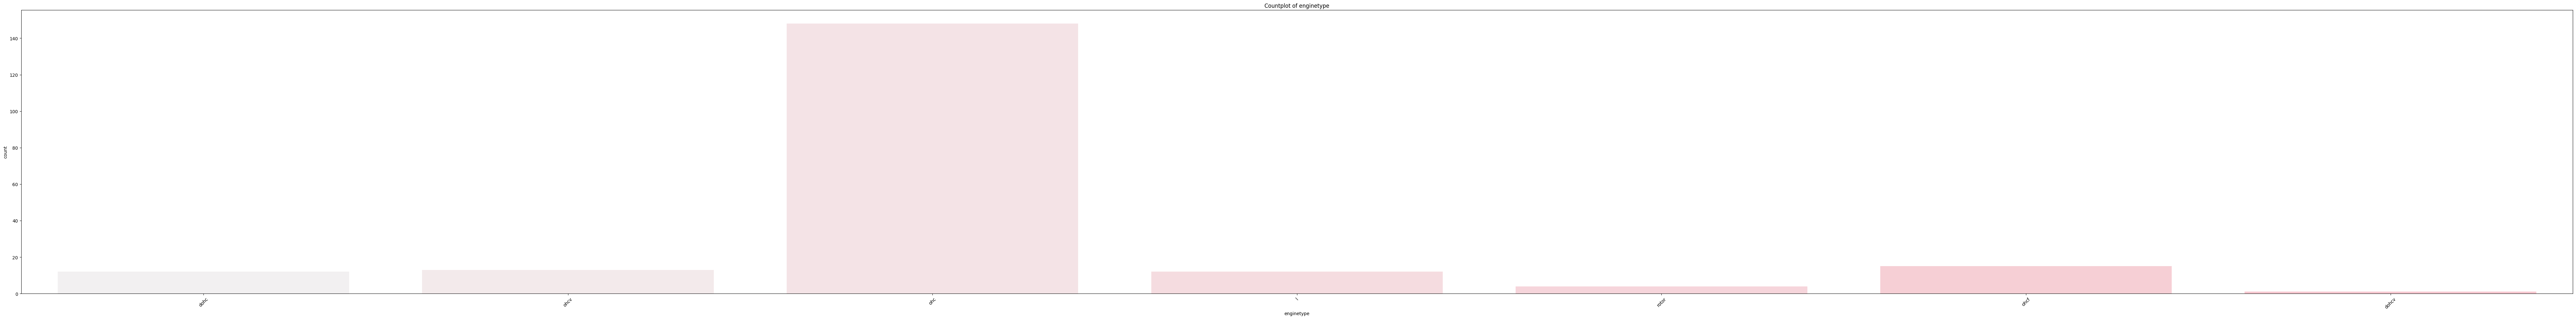

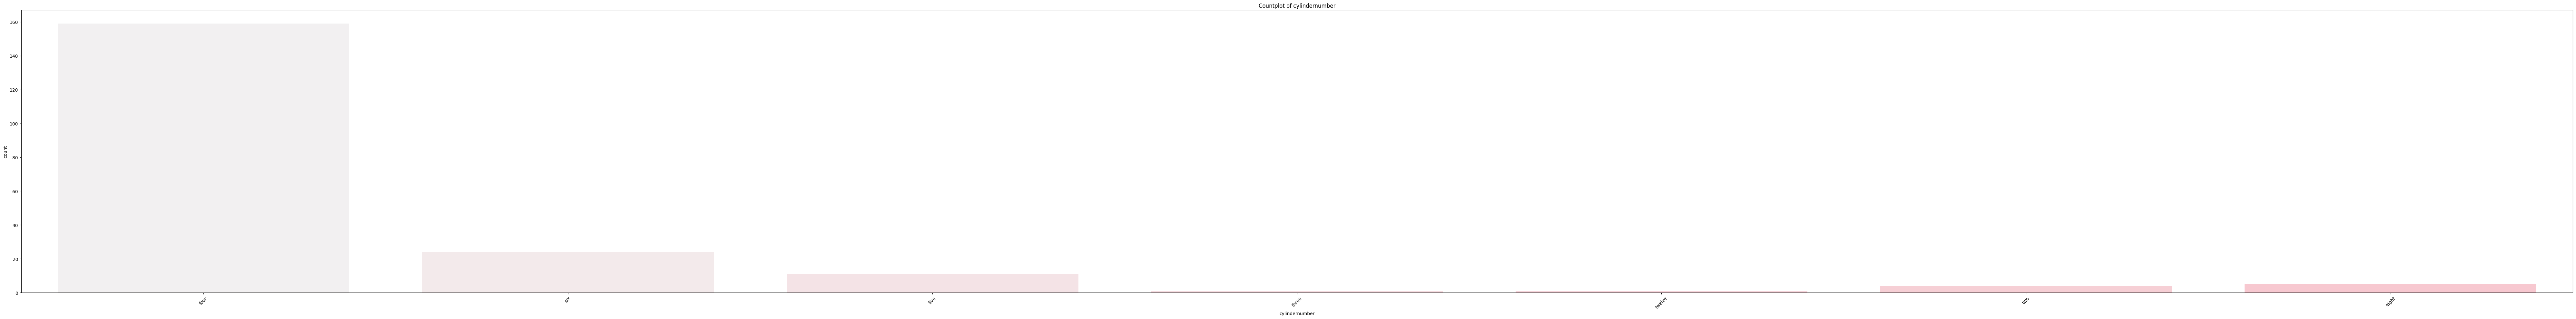

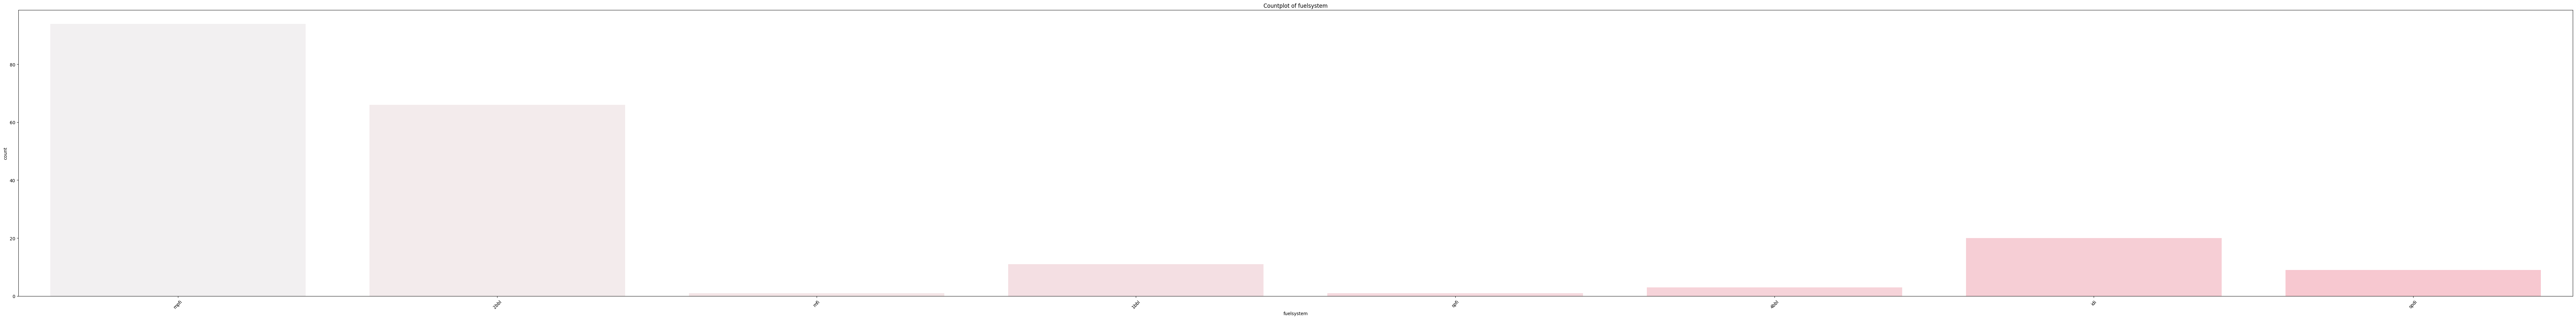

In [25]:
for col in cat_cols:
    plt.figure(figsize=(80,10))
    pink_palette = sns.light_palette("pink", n_colors=len(df[col].unique()))
    sns.countplot(x=df[col], palette=pink_palette)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



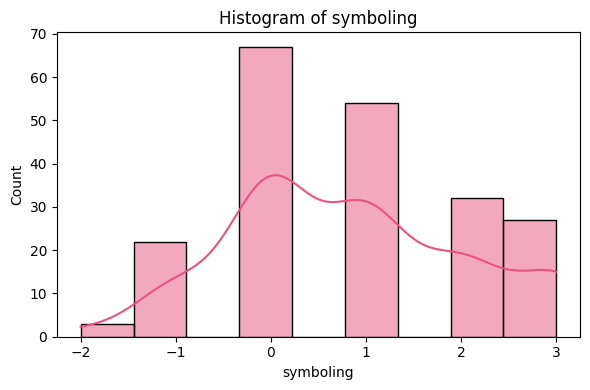

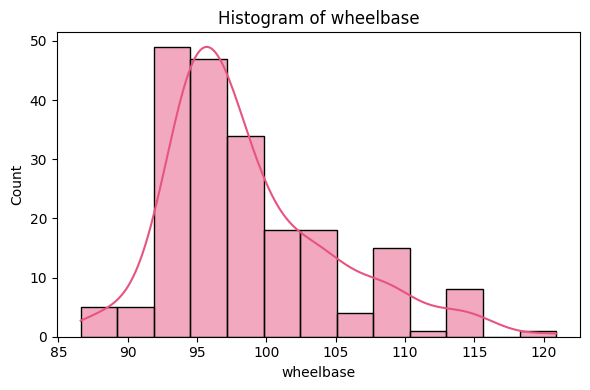

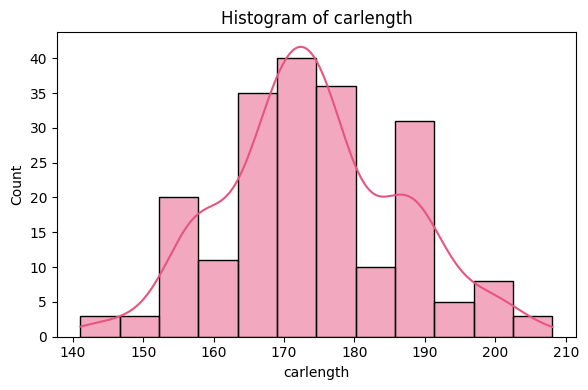

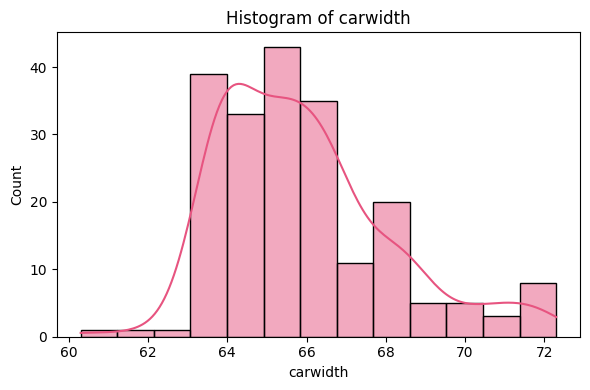

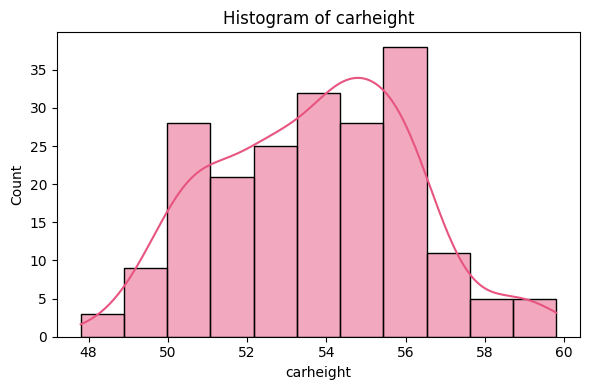

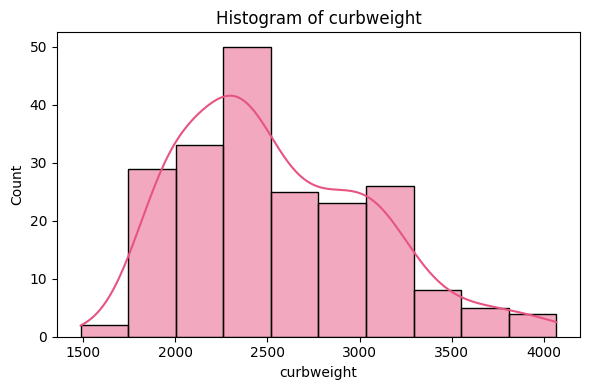

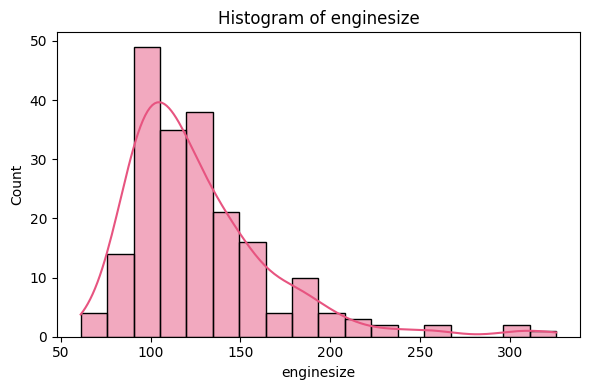

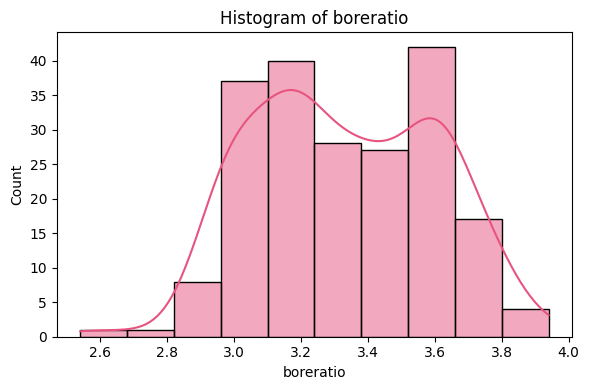

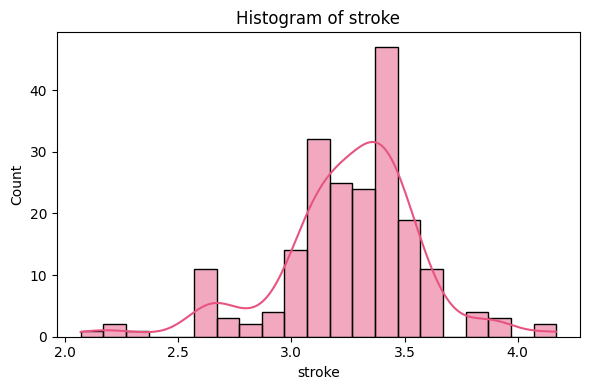

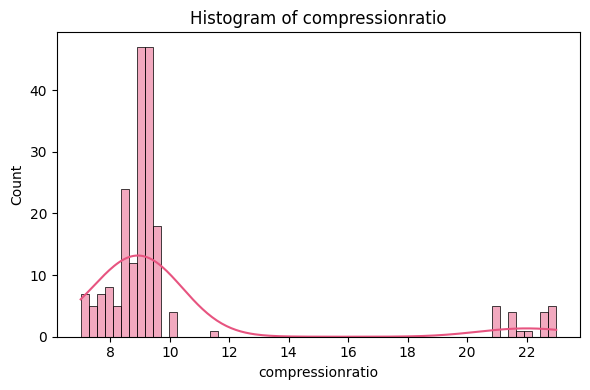

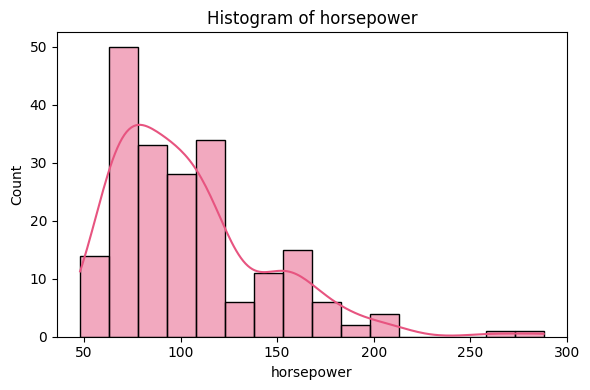

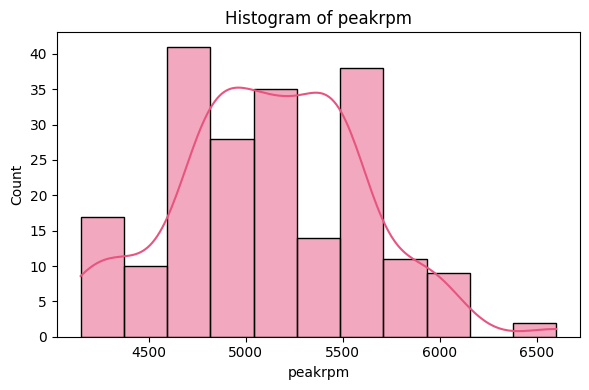

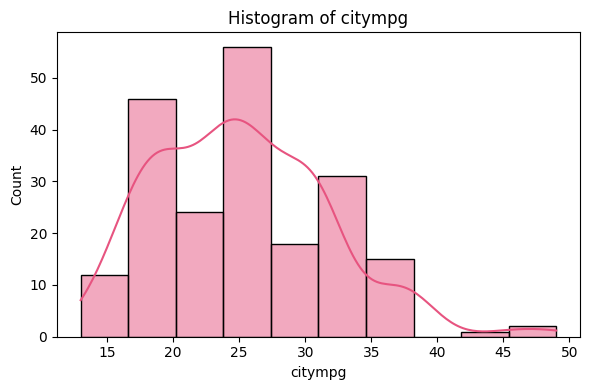

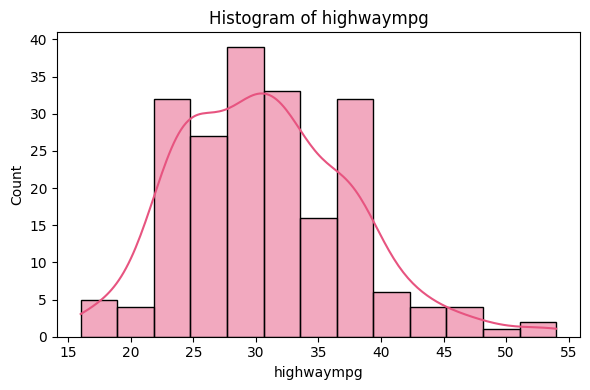

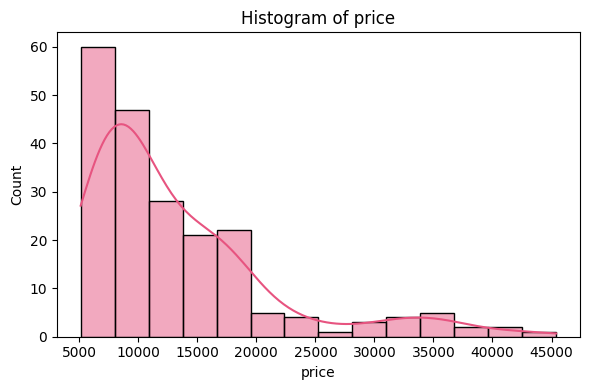

In [26]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="#e75480")
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()


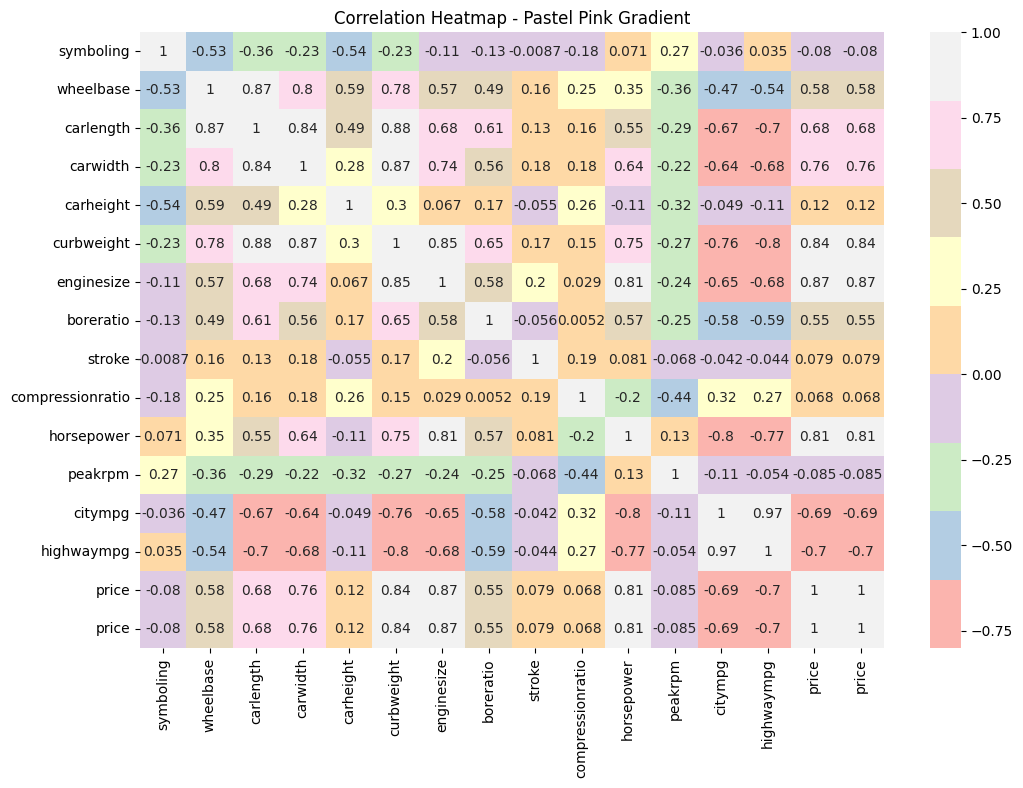

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols + ['price']].corr(), annot=True, cmap='Pastel1')
plt.title("Correlation Heatmap - Pastel Pink Gradient")
plt.show()


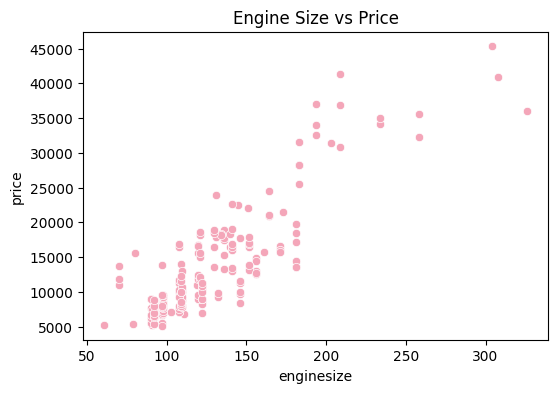

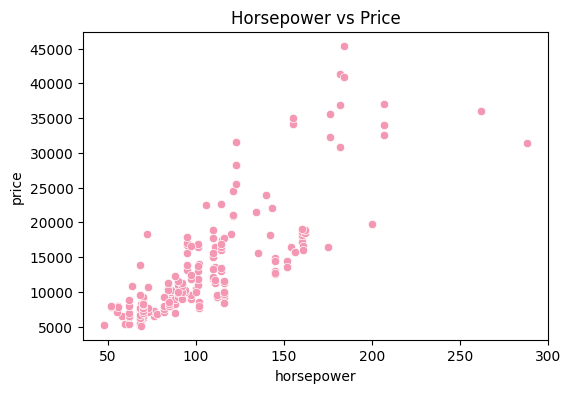

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='enginesize', y='price', data=df, color="#f4a6b9")
plt.title("Engine Size vs Price")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='horsepower', y='price', data=df, color="#f497b2")
plt.title("Horsepower vs Price")
plt.show()


In [29]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in price: {outliers.shape[0]}")
outliers[['price', 'enginesize', 'horsepower']]


Number of outliers in price: 15


,price,enginesize,horsepower
15,30760.0,209,182
16,41315.0,209,182
17,36880.0,209,182
47,32250.0,258,176
48,35550.0,258,176
49,36000.0,326,262
70,31600.0,183,123
71,34184.0,234,155
72,35056.0,234,155
73,40960.0,308,184


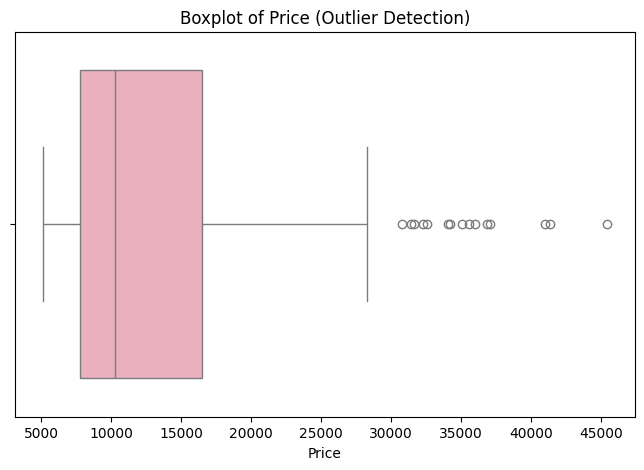

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'], color="#f4a6b9")
plt.title("Boxplot of Price (Outlier Detection)")
plt.xlabel("Price")
plt.show()


# <font color='hotpink'>**Preprocessing**

In [31]:
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Data size after removing outliers: {df_clean.shape[0]}")


Data size after removing outliers: 190


In [32]:
df_clean = df_clean.drop(['car_ID', 'CarName'], axis=1)
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean = df_clean.astype(float)

X = df_clean.drop('price', axis=1)
y = df_clean['price']


# <font color='hotpink'>**Building the Linear Regression Model**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")



R2 Score: 0.8050
MAE: 1408.79
RMSE: 1810.31
MSE: 3277228.78


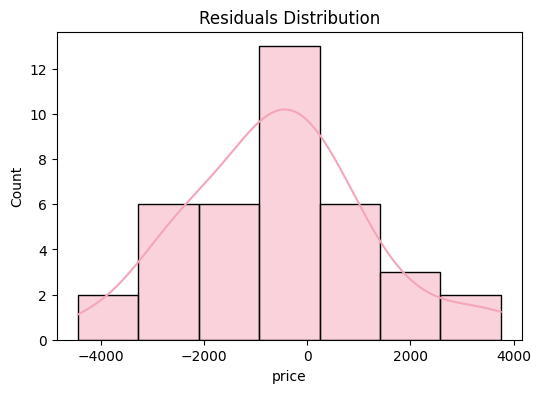

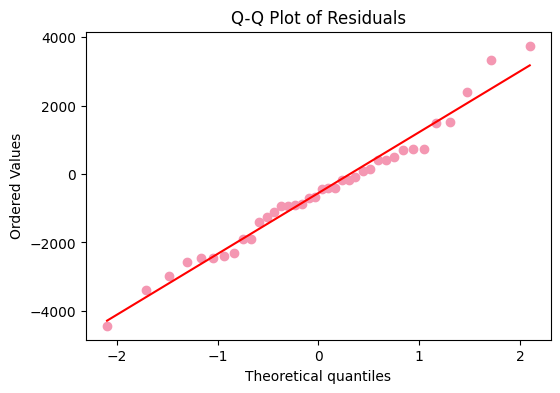

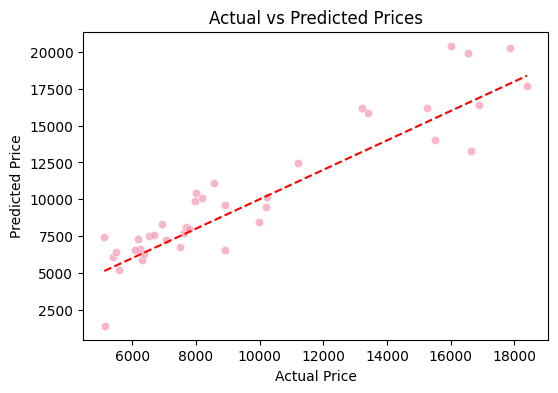

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color="#f4a6b9")
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.gca().get_lines()[0].set_color("#f497b2")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, color="#f497b2", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()



# <font color='hotpink'>**Building the  RandomForest Model**

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=300)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [40]:
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R2 Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")


R2 Score: 0.9048
MAE: 877.00
RMSE: 1264.74


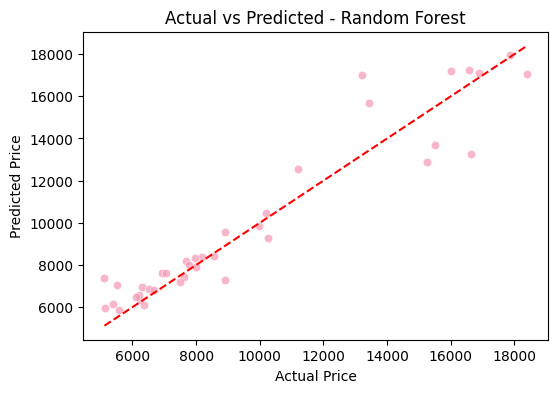

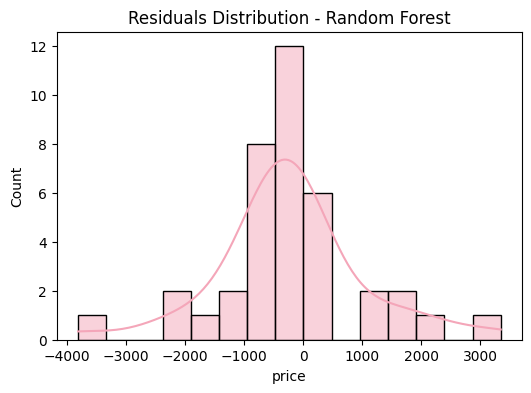

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf, color="#f497b2", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Random Forest")
plt.show()

plt.figure(figsize=(6,4))
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True, color="#f4a6b9")
plt.title("Residuals Distribution - Random Forest")
plt.show()
